In [1]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
import matplotlib.pyplot as plt

# Set configuration
image_size = 256
batch_size = 4
data_dir = "DATA"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transform
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define inverse transform for denormalization
inv_transform = transforms.Compose([
    transforms.Normalize(mean=[0., 0., 0.], std=[1/0.229, 1/0.224, 1/0.225]),
    transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1., 1., 1.])
])

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Load model
model_save_path = "model0.pth"
model = torch.load(model_save_path, map_location=device)
model.to(device)
model.eval()

# Load noise scheduler
num_train_timesteps = 1000
noise_scheduler = DDPMScheduler(num_train_timesteps=num_train_timesteps)

# Function to denoise and reconstruct image
def reconstruct_image(model, noisy_image, timesteps, class_labels):
    for t in reversed(range(len(timesteps))):
        with torch.no_grad():
            noise_pred = model(noisy_image, t, class_labels).sample
            noisy_image = noise_scheduler.step(noise_pred, t, noisy_image).prev_sample
    return noisy_image

# Visualize original, noisy, and reconstructed images
for i, (images, labels) in enumerate(dataloader):
    if i == 1:  # Limit to one batch for simplicity
        break

    images, labels = images.to(device), labels.to(device)
    class_labels = torch.tensor(labels, device=device)

    # Add noise to the images
    # timesteps = torch.randint(0, num_train_timesteps, (batch_size,), device=device, dtype=torch.int64)
    # 고정된 timestep 사용 (예: 최대 노이즈 단계)
    timesteps = torch.full((batch_size,), 50, device=device, dtype=torch.int64)

    noise = torch.randn_like(images)
    noisy_images = noise_scheduler.add_noise(images, noise, timesteps)

    # Reconstruct the images
    reconstructed_images = reconstruct_image(model, noisy_images, timesteps, class_labels)

    # Denormalize images for visualization
    images = torch.stack([inv_transform(img) for img in images])
    noisy_images = torch.stack([inv_transform(img) for img in noisy_images])
    reconstructed_images = torch.stack([inv_transform(img) for img in reconstructed_images])
    
    # Visualize results
    fig, axs = plt.subplots(batch_size, 3, figsize=(12, batch_size * 4))
    for idx in range(batch_size):
        axs[idx, 0].imshow(images[idx].permute(1, 2, 0).cpu().numpy().clip(0, 1))
        axs[idx, 0].set_title("Original")
        axs[idx, 0].axis("off")

        axs[idx, 1].imshow(noisy_images[idx].permute(1, 2, 0).cpu().numpy().clip(0, 1))
        axs[idx, 1].set_title("Noisy")
        axs[idx, 1].axis("off")

        axs[idx, 2].imshow(reconstructed_images[idx].permute(1, 2, 0).cpu().numpy().clip(0, 1))
        axs[idx, 2].set_title("Reconstructed")
        axs[idx, 2].axis("off")

    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7368\1268847406.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_save_path, map_location=device)
C:\U

ValueError: class_embedding needs to be initialized in order to use class conditioning

C:\Users\USER\AppData\Local\Temp\ipykernel_7368\647681465.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_save_path, map_location=device)


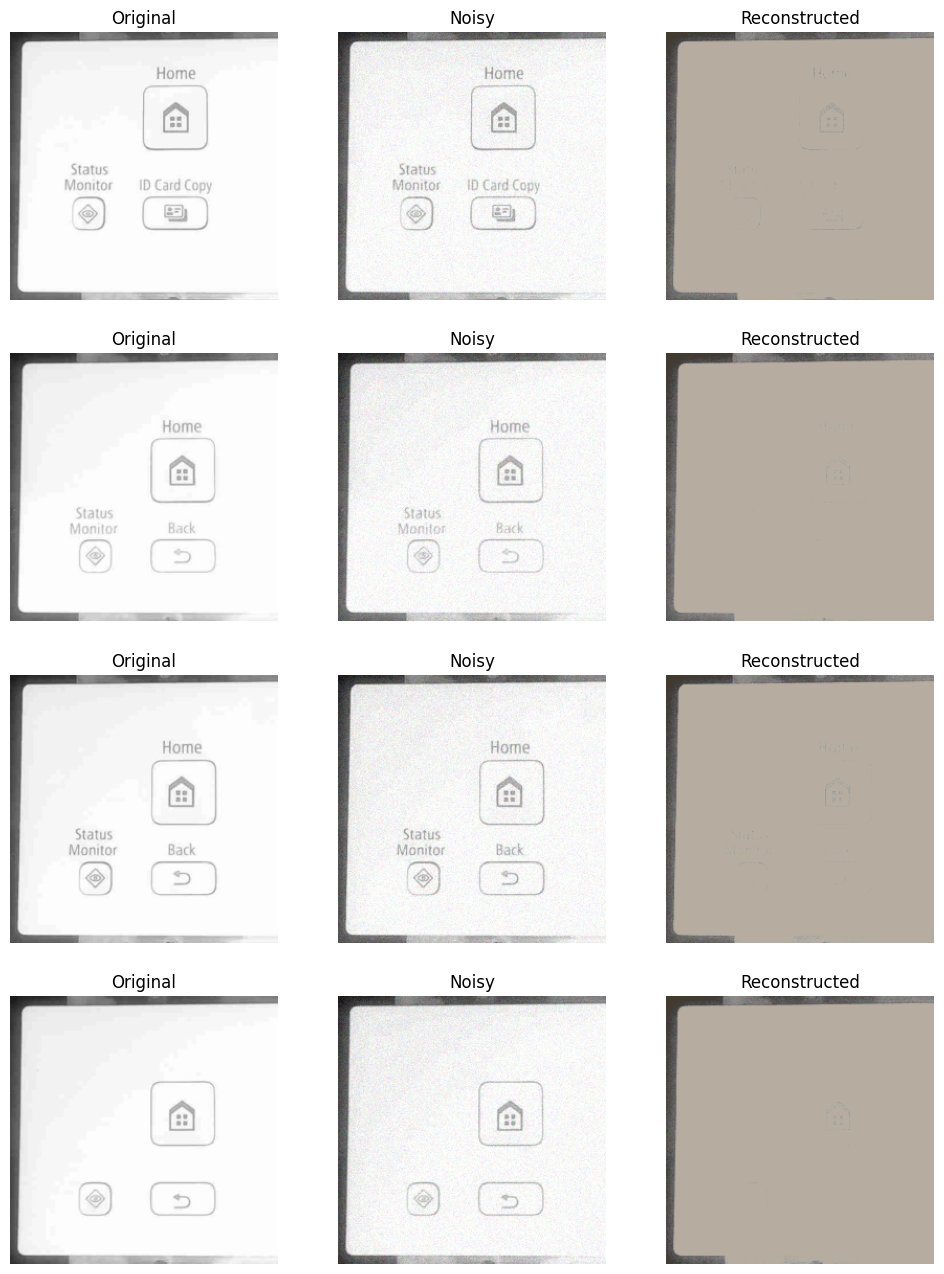

In [2]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
import matplotlib.pyplot as plt

# Set configuration
image_size = 256
batch_size = 4
data_dir = "DATA"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transform
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define inverse transform for denormalization
inv_transform = transforms.Compose([
    transforms.Normalize(mean=[0., 0., 0.], std=[1/0.229, 1/0.224, 1/0.225]),
    transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1., 1., 1.])
])

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Load model
model_save_path = "model0.pth"
model = torch.load(model_save_path, map_location=device)
model.to(device)
model.eval()

# Load noise scheduler
num_train_timesteps = 1000
noise_scheduler = DDPMScheduler(num_train_timesteps=num_train_timesteps)

# Function to denoise and reconstruct image
def reconstruct_image(model, noisy_image, timesteps):
    for t in reversed(range(len(timesteps))):
        with torch.no_grad():
            noise_pred = model(noisy_image, t).sample
            noisy_image = noise_scheduler.step(noise_pred, t, noisy_image).prev_sample
    return noisy_image

# Visualize original, noisy, and reconstructed images
for i, (images, labels) in enumerate(dataloader):
    if i == 1:  # Limit to one batch for simplicity
        break

    images, labels = images.to(device), labels.to(device)

    # Add noise to the images
    # timesteps = torch.randint(0, num_train_timesteps, (batch_size,), device=device, dtype=torch.int64)
    # 고정된 timestep 사용 (예: 최대 노이즈 단계)
    timesteps = torch.full((batch_size,), 50, device=device, dtype=torch.int64)

    noise = torch.randn_like(images)
    noisy_images = noise_scheduler.add_noise(images, noise, timesteps)

    # Reconstruct the images
    reconstructed_images = reconstruct_image(model, noisy_images, timesteps)

    # Denormalize images for visualization
    images = torch.stack([inv_transform(img) for img in images])
    noisy_images = torch.stack([inv_transform(img) for img in noisy_images])
    reconstructed_images = torch.stack([inv_transform(img) for img in reconstructed_images])
    
    # Visualize results
    fig, axs = plt.subplots(batch_size, 3, figsize=(12, batch_size * 4))
    for idx in range(batch_size):
        axs[idx, 0].imshow(images[idx].permute(1, 2, 0).cpu().numpy().clip(0, 1))
        axs[idx, 0].set_title("Original")
        axs[idx, 0].axis("off")

        axs[idx, 1].imshow(noisy_images[idx].permute(1, 2, 0).cpu().numpy().clip(0, 1))
        axs[idx, 1].set_title("Noisy")
        axs[idx, 1].axis("off")

        axs[idx, 2].imshow(reconstructed_images[idx].permute(1, 2, 0).cpu().numpy().clip(0, 1))
        axs[idx, 2].set_title("Reconstructed")
        axs[idx, 2].axis("off")

    plt.show()

In [6]:
from numba import cuda

device = cuda.get_current_device(); device.reset()